<!-- Header Section -->
<header style="background-color:white; padding:20px; border-radius:20px;">
    <h1 style="font-family:newtimeroman; font-size:350%; color:Black; text-align:center;">
        Iris Flower Claification Model
    </h1>
    <div class="image-container" style="text-align:center; margin-top:20px;">
        <img src="iris.png" alt="Iris Flower" style="border-radius:15px; max-width:80%;">
    </div>
    <div class="image-container" style="text-align:center; margin-top:20px;">
        <img src="download.jfif" alt="Iris Flower2" style="border-radius:15px; max-width:80%;">
    </div>
</header>


**Iris flower has three species- Iris-setosa, Iris-versicolor, and Iris-virginica.**

Dataset description:

1. Iris-setosa : 50
2. Iris-versicolor : 50
3. Iris-virginica : 50

#### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import matplotlib

#### Loading Libraries

In [2]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Loading Dataset

In [3]:
df = pd.read_csv('Iris Flower - Iris.csv')

In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df['Species'].value_counts() ##Dispalying no of samples on each class

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
df = df.drop(columns = ['Id']) ## Deleting column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Check the first few rows to understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Dataset Preprocessing

In [9]:

## Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Exploratory Data Analysis

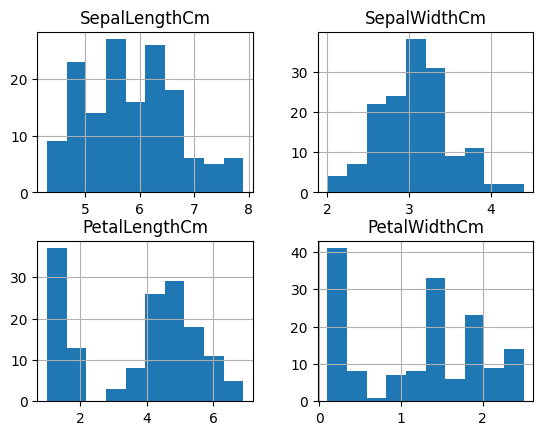

In [10]:
df.hist()
plt.show()

In [11]:
## Scatterplot
colors = ['red','blue','green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

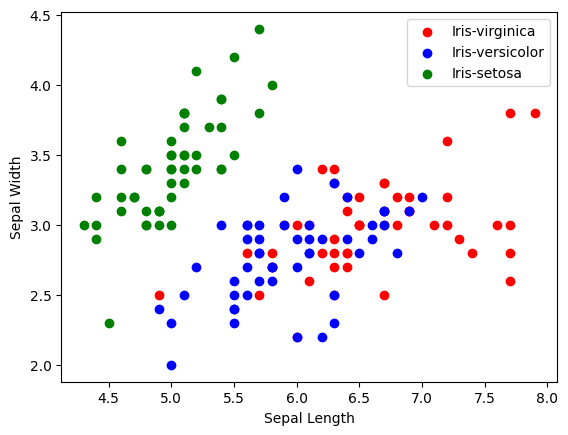

In [12]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'] , x['SepalWidthCm'] , c=colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
     

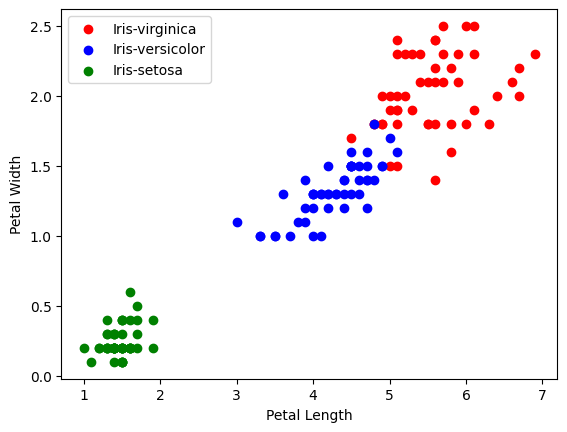

In [13]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'] , x['PetalWidthCm'] , c=colors[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

#### Creation of corelation Matrix

<Axes: >

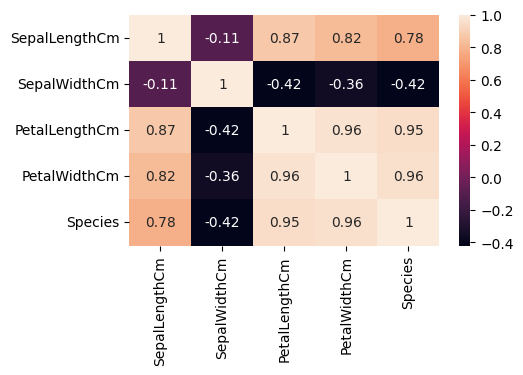

In [14]:
# Import necessary module for label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Species' column
df['Species'] = le.fit_transform(df['Species'])

# Create a correlation matrix after encoding
corr = df.corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(5, 3))  # Adjusted size for better visibility
sns.heatmap(corr, annot=True, ax=ax)

#### Encoding Dataset

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['Species'] = le.fit_transform(df['Species'])
df.tail()
     

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### Model Training

In [17]:
# train -75
# test -25

from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y =df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prediction of the iris species for the test set
y_pred = logreg.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9555555555555556


In [19]:
# K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prediction of the iris species for the test set
y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9555555555555556


In [20]:
# Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Calculating the accuracy of the model
accuracy = dtc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [21]:
## Support Vector Machine classifier
svm = SVC()
svm.fit(X_train, y_train)

accuracy = svm.score(X_test,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [22]:
# Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

accuracy = model.score(X_test,y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


In [23]:
# Linear Discriminant Analysis
"""A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions, using the transform method."""

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

accuracy = lda.score(X_test,y_test)
print(f"Accuracy: {accuracy}")
     

Accuracy: 0.9555555555555556


#### Concluion

Machine learning models successfully classified Iris flowers with high accuracy, demonstrating the potential for automated flower identification in various applications.
KNN emerged as the optimal model, offering a balance of accuracy and efficiency.
Further exploration could involve optimizing hyperparameters, testing with imbalanced datasets, and implementing the model on real-world scenarios.